In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('bike.csv')
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           210 non-null    int64  
 1   Date                 210 non-null    object 
 2   Day                  210 non-null    object 
 3   High Temp (°F)       210 non-null    float64
 4   Low Temp (°F)        210 non-null    float64
 5   Precipitation        210 non-null    object 
 6   Brooklyn Bridge      210 non-null    float64
 7   Manhattan Bridge     210 non-null    int64  
 8   Williamsburg Bridge  210 non-null    float64
 9   Queensboro Bridge    210 non-null    float64
 10  Total                210 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 18.2+ KB


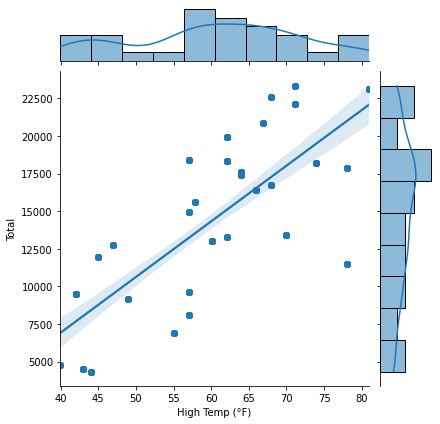

In [8]:
sns.jointplot(x=df['High Temp (°F)'], y=df['Total'], data=df, kind='reg')

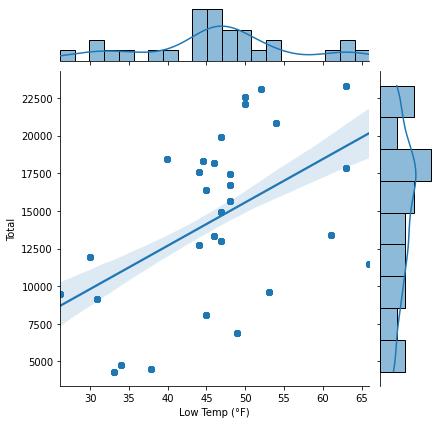

In [9]:
sns.jointplot(x=df['Low Temp (°F)'], y=df['Total'], data=df, kind='reg')

In [11]:
X= df[['Low Temp (°F)']]

Y=df[['Total']]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   210 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['Low Temp (°F)'].to_numpy()
x_test=x_test['Low Temp (°F)'].to_numpy()
y_train=y_train['Total'].to_numpy()
y_test=y_test['Total'].to_numpy()



x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (168, 1)
Test - Predictors shape (42, 1)
Train - Target shape (168, 1)
Test - Target shape (42, 1)


In [13]:
cls = linear_model.LinearRegression()
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
prediction = cls.predict(x_test)
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [16]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [17]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):

        #pred.append((slope * x_test.iloc[i]['TV']) + intercept)
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [19]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [20]:
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
#pred_df = pd.DataFrame(prediction)
#pred_df.columns=['sales']
#error =  mse_calc(prediction, y_test)
error =  mse_calc(prediction, y_test)

print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [-530.74482128]
Slope of the model [322.62816163]
Mean squared error of the model 22650141.266803168
R squared value 0.05505317554442701
